In [4]:
import numpy as np
import matplotlib.pyplot as plt
import peakutils
from scipy.signal import find_peaks, peak_widths
from scipy.integrate import simps
plt.style.use('dark_background')
%matplotlib inline

In [5]:
contrac = np.loadtxt('contraction.csv', delimiter=',')

## Info about experiment
Duration of the experiment **110 minutes** <br>
Stabilization **0-30 minutes** <br>
KCL application **31-37 minutes** <br>
Carbacholine application **56-62 minutes**

Let's determine time step Δt:

In [6]:
Δt = 110 / len(contrac)
time = np.arange(0, 110, Δt)
print('time step Δt = %s' % Δt)

time step Δt = 0.0016784924086366065


In [7]:
base = peakutils.baseline(contrac, 5)
contrac_aligned = contrac - base

General view after alignment

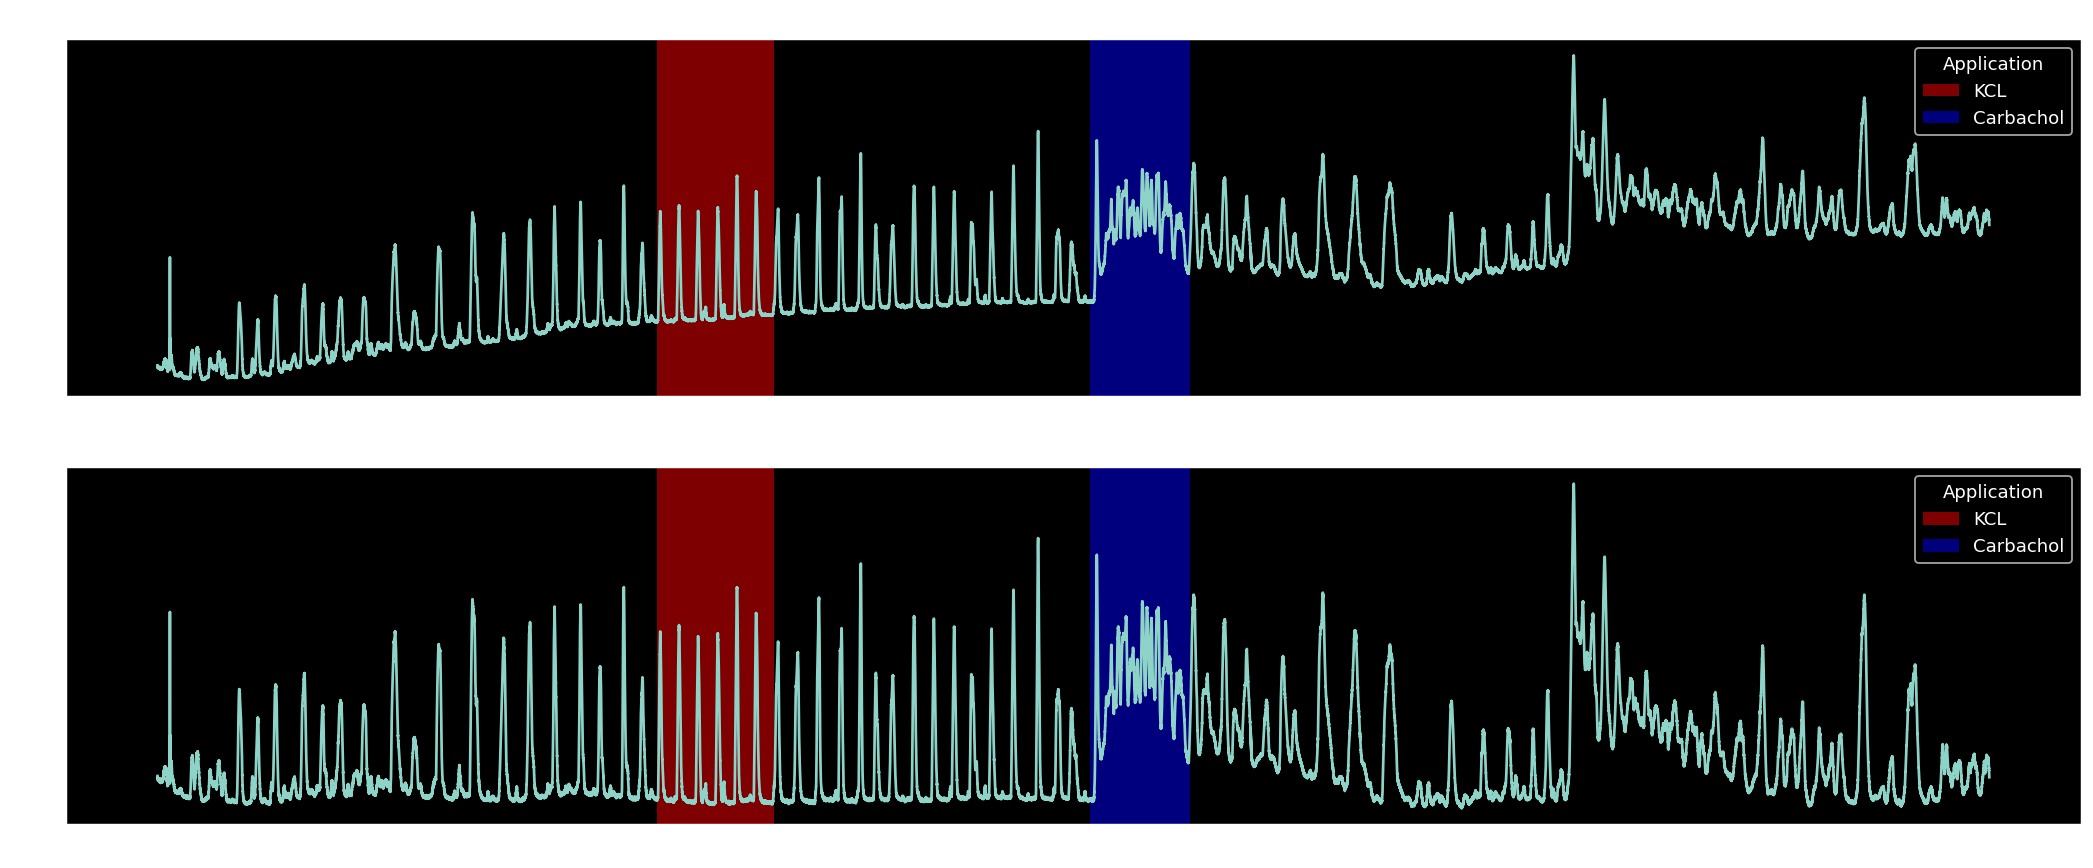

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8), dpi=130)

axs[0].plot(time, contrac)
axs[0].axvspan(30, 37, facecolor='red', edgecolor='None', 
         alpha=.5, label='KCL')
axs[0].axvspan(56, 62, facecolor='blue', edgecolor='None', 
          alpha=.5, label='Carbachol')

axs[0].legend(title='Application')
axs[0].set_title('Before the alignment procedure')

axs[1].plot(time, contrac_aligned)
axs[1].axvspan(30, 37, facecolor='red', edgecolor='None', 
           alpha=.5, label='KCL')
axs[1].axvspan(56, 62, facecolor='blue', edgecolor='None', 
           alpha=.5, label='Carbachol')

axs[1].legend(title='Application')
axs[1].set_title('After the alignment procedure')

fig.savefig('General_traces.pdf')

In [9]:
peaks, peak_values = find_peaks(contrac_aligned, height=0.5, distance=300)
half_widths, width_heights_half, left, right = peak_widths(contrac_aligned, peaks, rel_height=0.5)
half_widths = half_widths * Δt
left_bounds = left * Δt
right_bounds = right * Δt

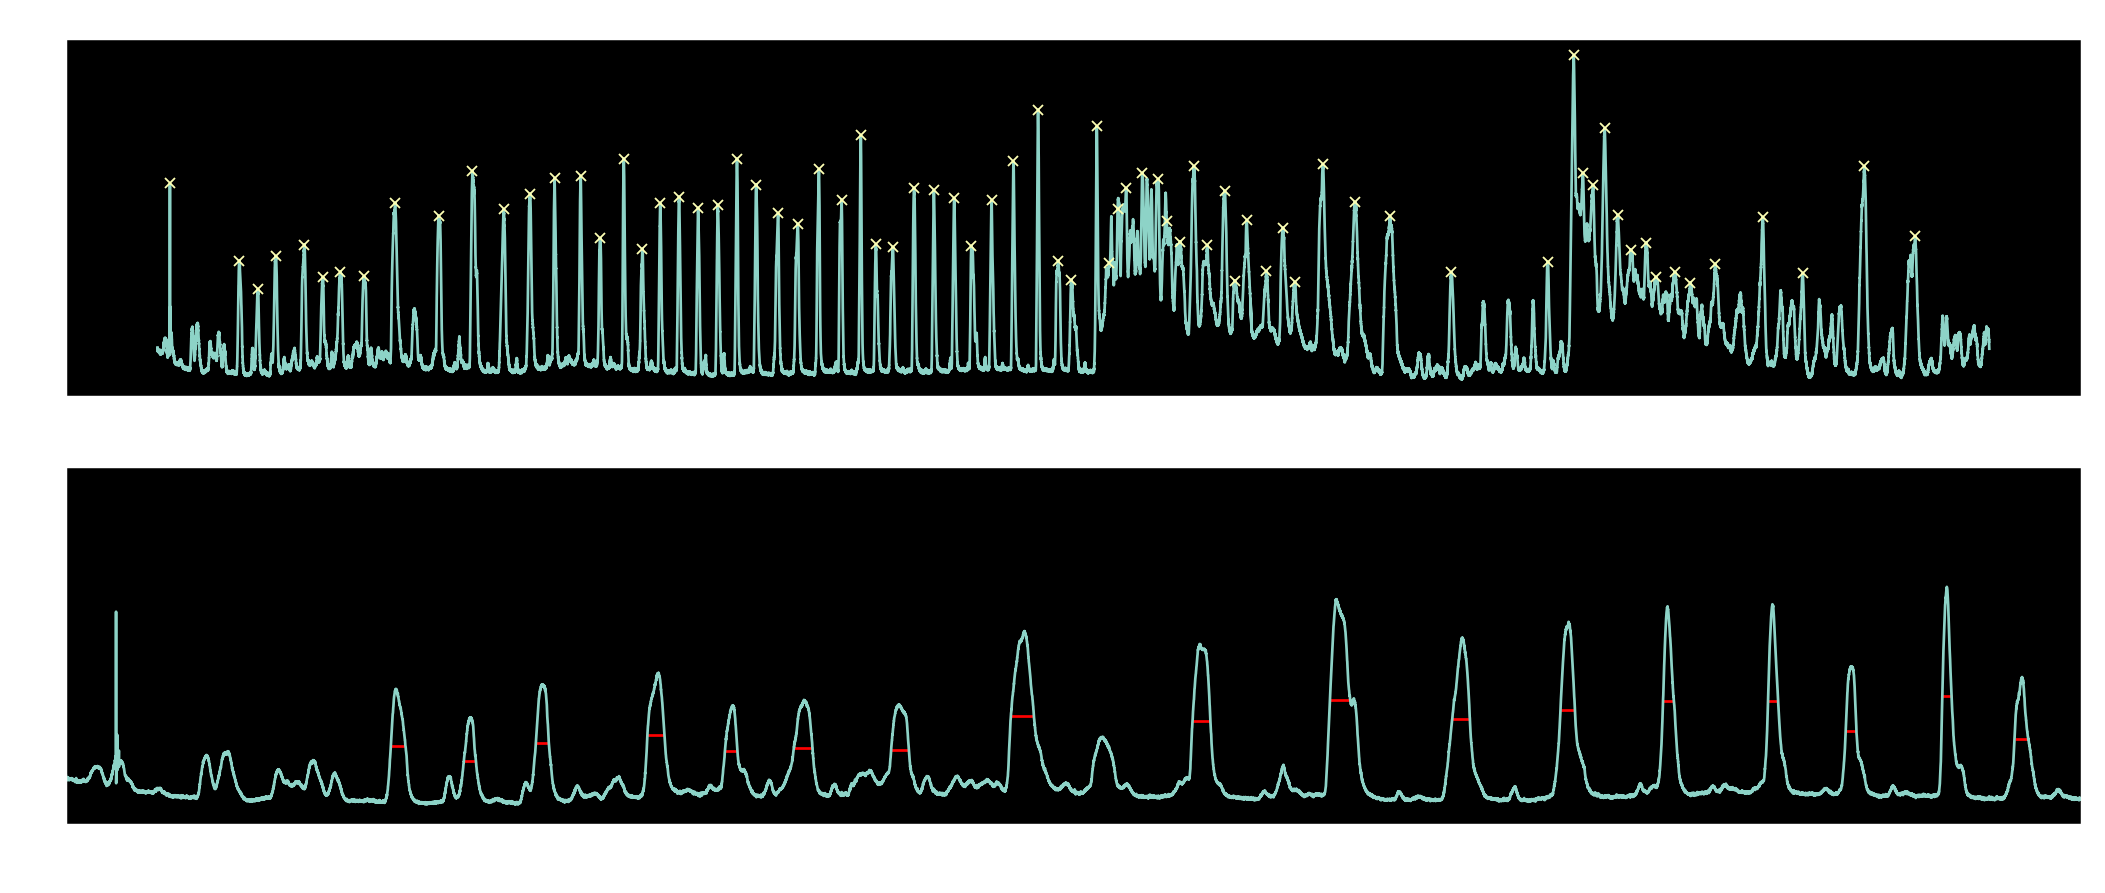

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8), dpi=130)
axs[0].plot(time, contrac_aligned)
axs[0].plot(time[peaks], contrac_aligned[peaks], 'x')
axs[0].set_title('Contraction of myometrium over time')
axs[1].set(xlabel='time [mins]')
axs[1].plot(time, contrac_aligned)
axs[1].hlines(width_heights_half, left*Δt, right*Δt, color="red")
axs[1].set_xlim([0, 30])
fig.savefig('Peaks_half_widths_contraction.pdf')

(56.0, 62.0)

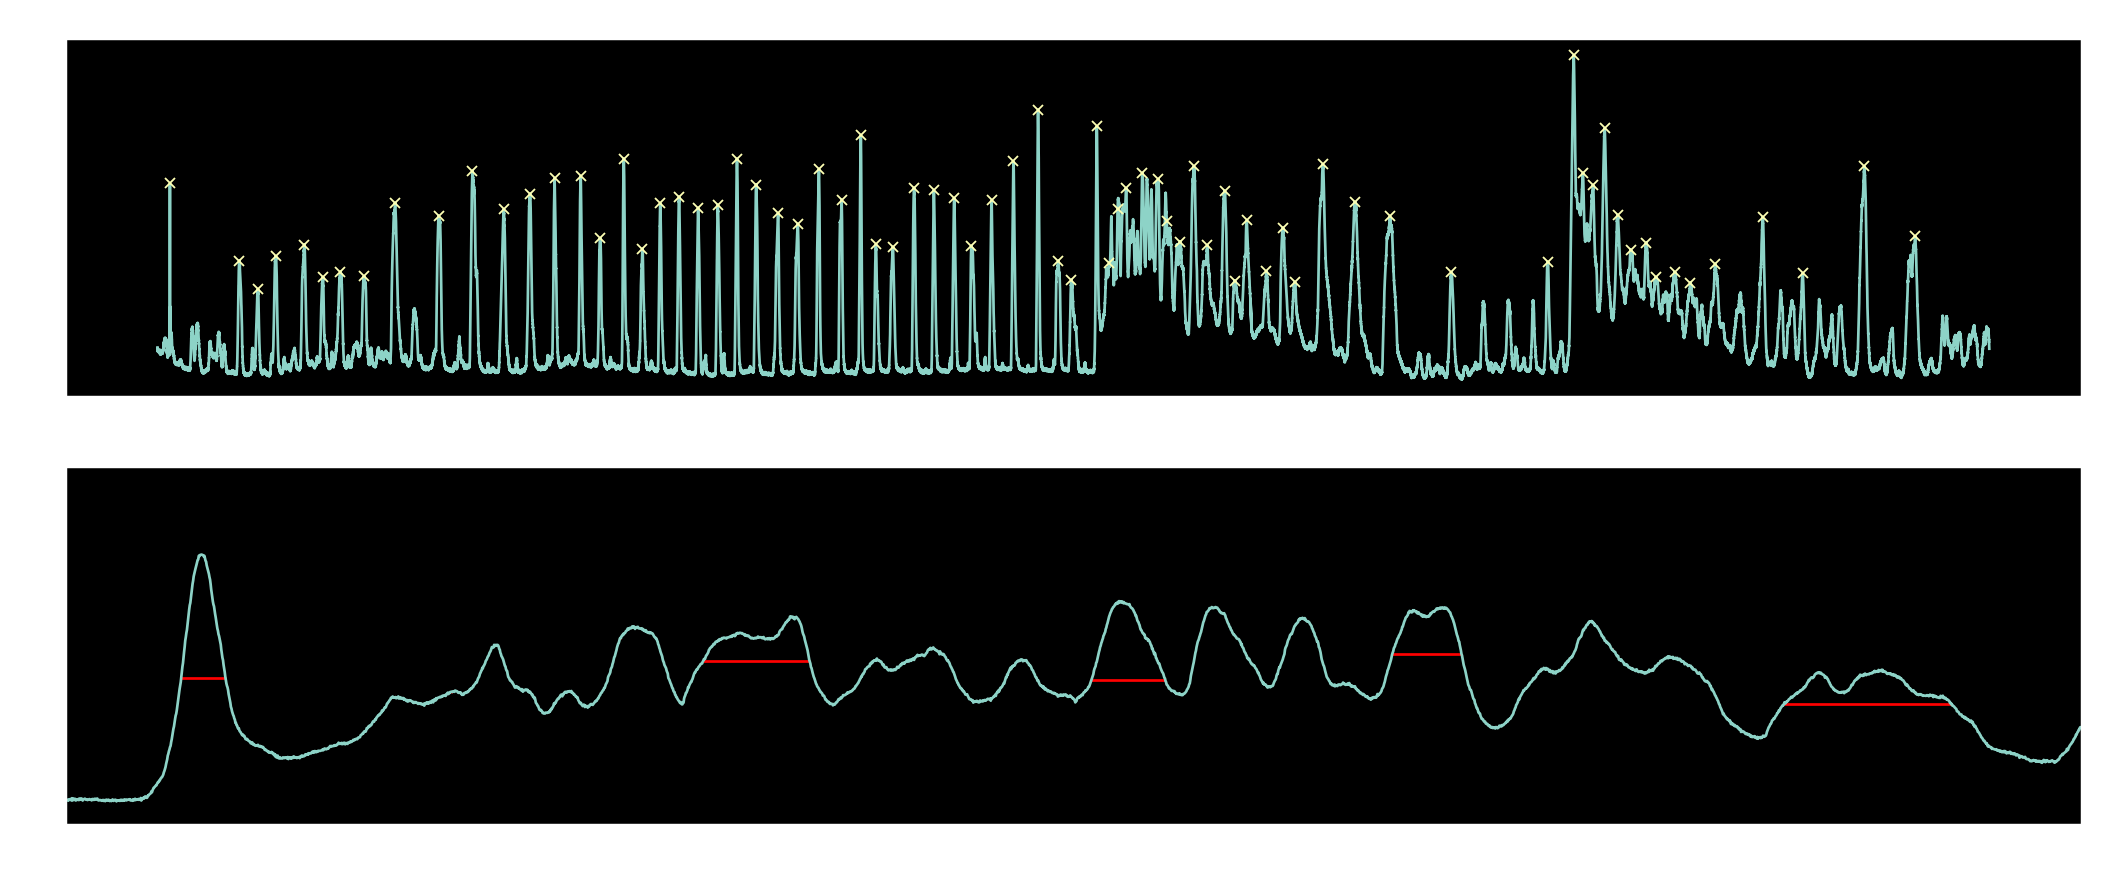

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8), dpi=130)
axs[0].plot(time, contrac_aligned)
axs[0].plot(time[peaks], contrac_aligned[peaks], 'x')
axs[0].set_title('Contraction of myometrium over time')
axs[1].set(xlabel='time [mins]')
axs[1].plot(time, contrac_aligned)
axs[1].hlines(width_heights_half, left*Δt, right*Δt, color="red")
axs[1].set_xlim([56, 62])

Calculating amplitude

In [12]:
from BaselineRemoval import BaselineRemoval

In [13]:
aligned = BaselineRemoval(contrac_aligned)
zhang = aligned.ZhangFit()

In [23]:
peaks, peak_values = find_peaks(zhang, height=0.5, distance=200)
widths, width_heights, left, right = peak_widths(zhang, peaks, rel_height=0.98)
left = left.astype(int)
right = right.astype(int)
left_full = left * Δt
right_full = right * Δt

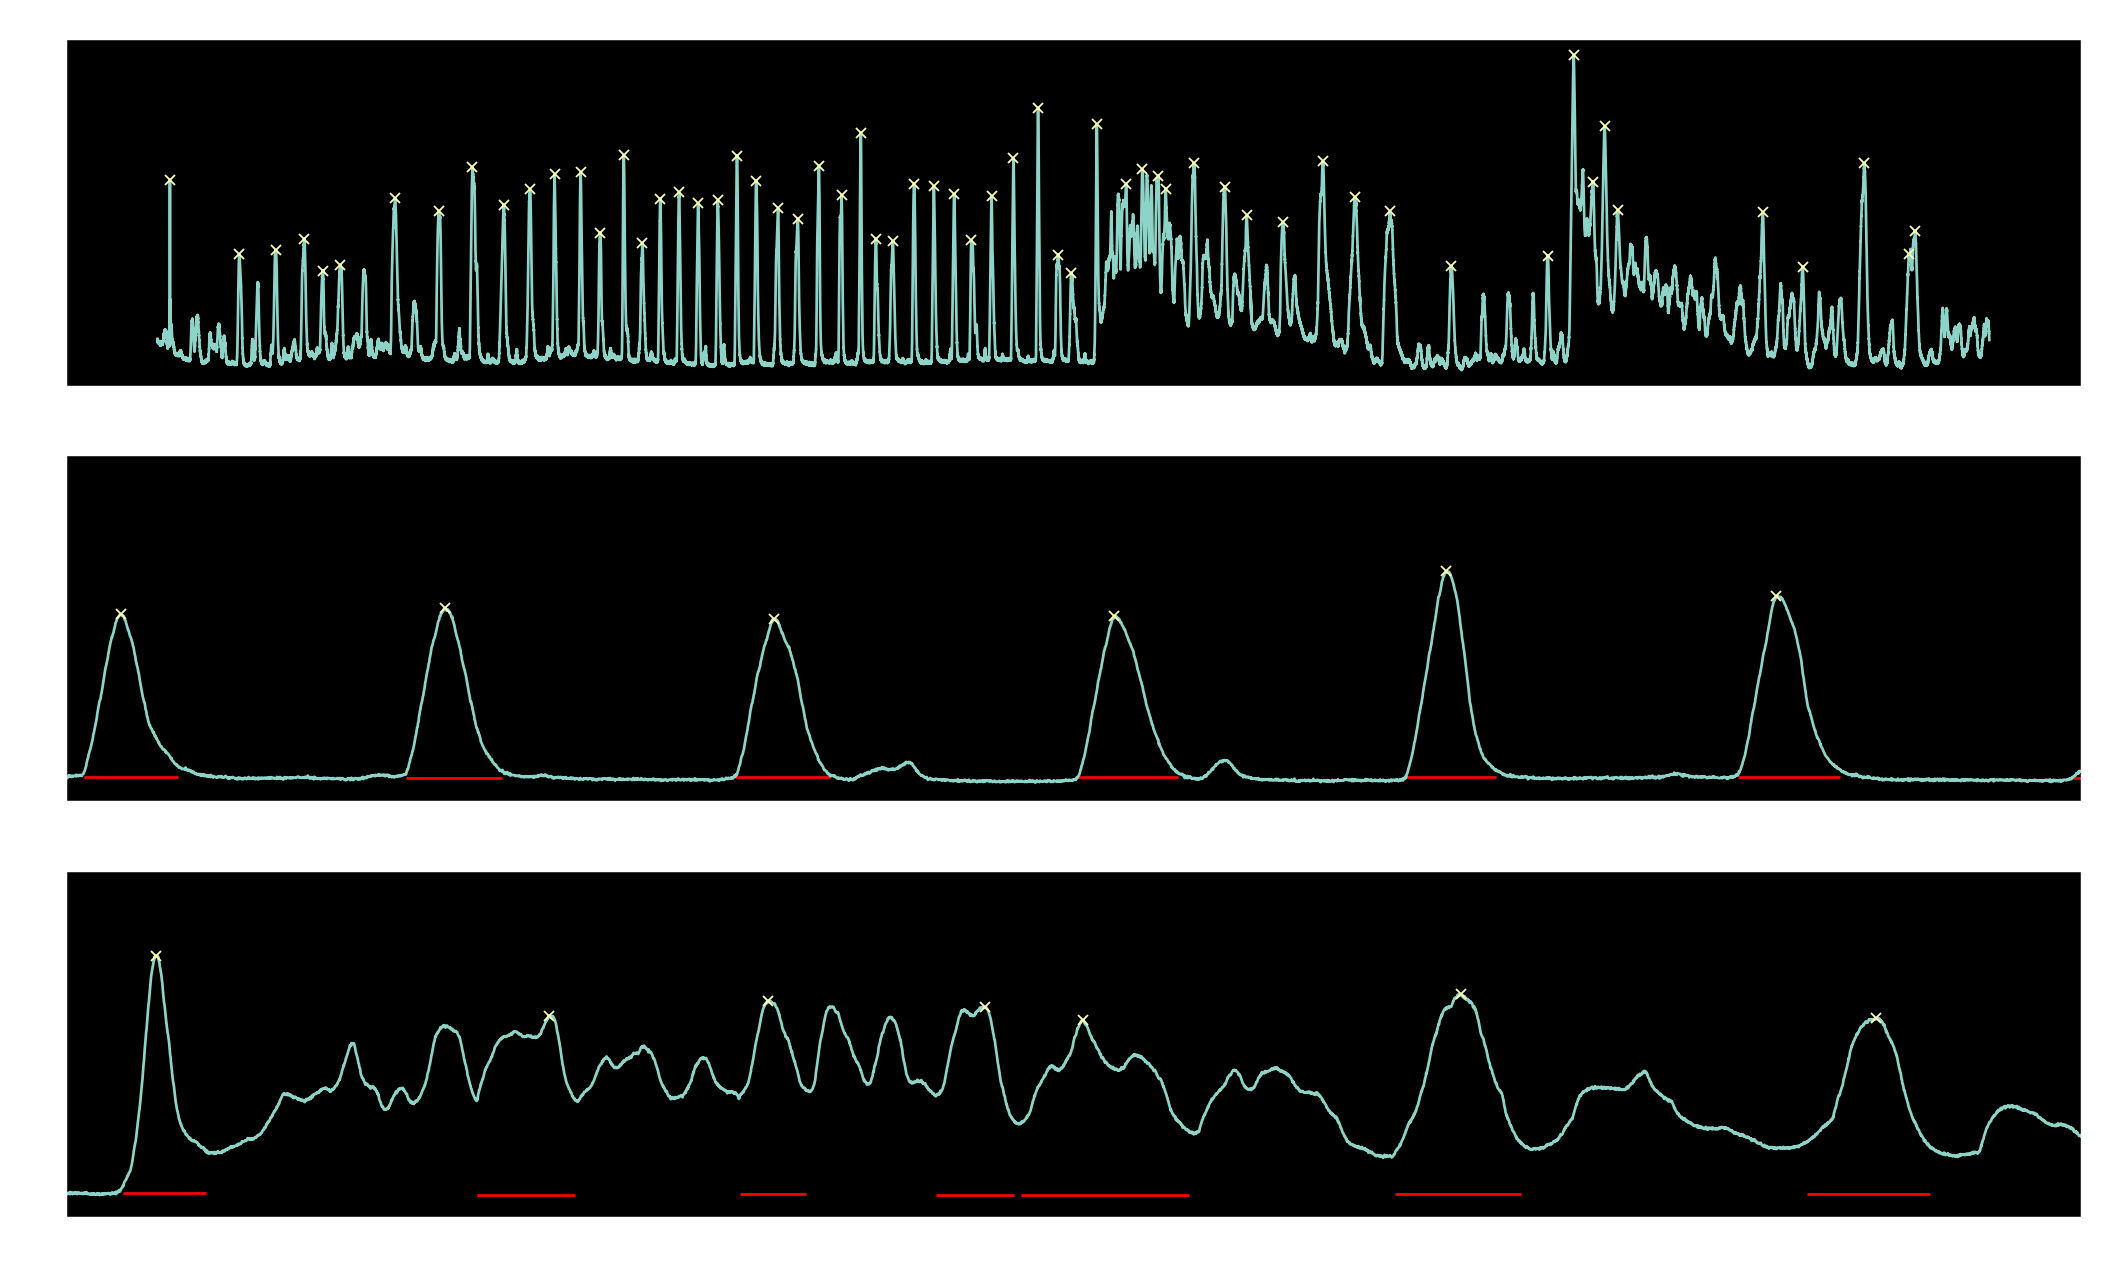

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(20, 12), dpi=130);
axs[0].plot(time, contrac_aligned);
axs[0].plot(time[peaks], contrac_aligned[peaks], 'x');
axs[0].set_title('Contraction of myometrium over time');
axs[1].plot(time, contrac_aligned);
axs[1].plot(time[peaks], contrac_aligned[peaks], 'x');
axs[1].hlines(width_heights, left*Δt, right*Δt, color="red");
axs[1].set_xlim([30, 37]);
axs[2].plot(time, contrac_aligned);
axs[2].plot(time[peaks], contrac_aligned[peaks], 'x')
axs[2].hlines(width_heights, left*Δt, right*Δt, color="red");
axs[2].set_xlim([56, 65]);
axs[2].set(xlabel='time [mins]');
fig.savefig('Areas.pdf')

### Find areas and amplitudes

In [42]:
amps = []
areas = []
for idx, peak in enumerate(peaks):
    neibs = np.diff( contrac_aligned[peak-300:peak+300] ) 
    amp = contrac_aligned[peak] 
    amps.append(amp)
    area = simps(contrac_aligned[np.where( (time > left_full[idx]) & (time < right_full[idx]))],
                 time[np.where( (time > left_full[idx]) & (time < right_full[idx]))] * 60) 
    areas.append(area)

### Amplitudes

In [43]:
amps_onset = amps[:np.argmax(time[peaks] > 30)]
amps_kcl = amps[np.argmax(time[peaks] > 30) : np.argmax(time[peaks] > 37)]
amps_carbocholine = amps[np.argmax(time[peaks] > 56) : np.argmax(time[peaks] > 62)]

### Areas

In [44]:
areas_onset = areas[:np.argmax(time[peaks] > 30)]
areas_kcl = areas[np.argmax(time[peaks] > 30) : np.argmax(time[peaks] > 37)]
areas_carbocholine = areas[np.argmax(time[peaks] > 56) : np.argmax(time[peaks] > 62)]

### Half-widths

In [45]:
hw_onset = half_widths[:np.argmax(time[peaks] > 30)]
hw_kcl = half_widths[np.argmax(time[peaks] > 30) : np.argmax(time[peaks] > 37)]
hw_carbocholine = half_widths[np.argmax(time[peaks] > 56) : np.argmax(time[peaks] > 62)]

### Errorbars

In [46]:
y = [np.mean(amps_onset), np.mean(amps_kcl), np.mean(amps_carbocholine)]
labels = ['Control', 'KCL', 'Carbacholine']
x = np.arange(len(labels))
error = [np.std(amps_onset)/np.sqrt(len(amps_onset)), 
         np.std(amps_kcl)/np.sqrt(len(amps_kcl)), 
         np.std(amps_carbocholine)/np.sqrt(len(amps_carbocholine))]

y_hw = [np.mean(hw_onset), np.mean(hw_kcl), np.mean(hw_carbocholine)]
error_hw = [np.std(hw_onset)/np.sqrt(len(hw_onset)), 
            np.std(hw_kcl)/np.sqrt(len(hw_kcl)), 
            np.std(hw_kcl)/np.sqrt(len(hw_kcl))]

y_ar = [np.mean(areas_onset), np.mean(areas_kcl), np.mean(areas_carbocholine)]
error_ar = [np.std(areas_onset)/np.sqrt(len(areas_onset)), 
            np.std(areas_kcl)/np.sqrt(len(areas_kcl)), 
            np.std(areas_carbocholine)/np.sqrt(len(areas_carbocholine))]

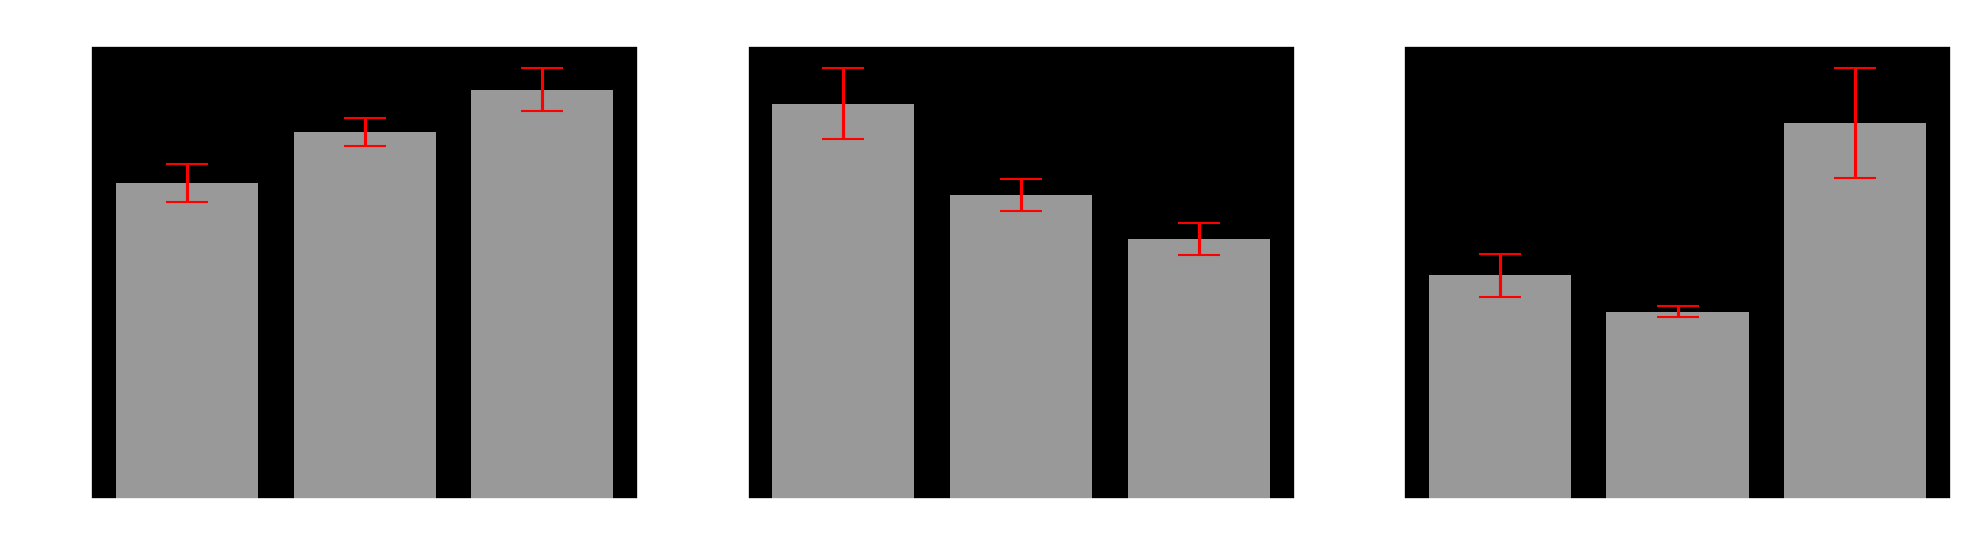

In [47]:
fig, ax = plt.subplots(1, 3, dpi=150, figsize=(16, 4));
ax[0].bar(x, y, yerr=error, align='center', alpha=0.8, ecolor='red', capsize=10, facecolor='silver');
ax[0].set(ylabel='Amplitude, g');
ax[0].set_xticks(x);
ax[0].set_title('Contraction amplitude');
ax[0].set_xticklabels(labels);
ax[1].bar(x, y_hw, yerr=error_hw, align='center', alpha=0.8, ecolor='red', capsize=10, facecolor='silver');
ax[1].set(ylabel='Half-widths, min');
ax[1].set_xticks(x);
ax[1].set_title('Contraction half-widths');
ax[1].set_xticklabels(labels);
ax[2].bar(x, y_ar, yerr=error_ar, align='center', alpha=0.8, ecolor='red', capsize=10, facecolor='silver');
ax[2].set(ylabel='Areas, $g \cdot s$');
ax[2].set_xticks(x);
ax[2].set_title('Contraction areas');
ax[2].set_xticklabels(labels);
fig.savefig('contraction_errorbars.pdf')